# How can the company improve collaboration?

We are going to map out the company's employee network using message data to understand interdepartmental dynamics better and explore how the company shares information. 

The ultimate goal of this project is to think of ways to improve collaboration throughout the company. 

# Summary
It has been an exhilarating journey throughtout the course of this report. We explored the data avalible in many different ways and, in order to make this report concise, I divided it into 3 notebooks: the functions notebook has the functions I used to the plots and the appendices notebook have some plots if you want to see more about the data visualization. I kept in this notebook only the informations I considered more important for my storytelling and I may cite in some parts a insight I got from a plot in the appendices notebook or an extra analisys I did there.

Our data consisted of a total of 3509 messages sent from a company with 664 employees registered(664 which sent at least one message). The data colected was about months 6 to 11 from 2021. Along our study, we found the following conclusions about the data:
1. Sales was the most active department, followed by Operations and then Admin. All these departments were more active during the first two months and then lost most of their activities.
2. We found that the employee with most connections was the one with id 598, but he sent no messages on the last three months. Considering the employees who were active at least on month 10 or 11, we find the employee with most connections is the one with id 144.
3. The Sales department is the most influent department, as it sends messages to more departments and to more employees.
4. The employee 605 sent more messages and was top-4 on connections made. However, he had low activity on the lasts months. Employee 144 sent more messages when considering months 8 through 11, besides being the most connected one. Considering the one who sent more messages, employee 605 id the most influential.

And we have the following findings about the data:

- We had a much more intense communication during the first two months, and it dropped a lot over time. This behavior corresponds to typical social networks behavior, that is a growth on the beginning and it's sustained by just some active users as the time passes[1].
- The lower activity did not have any tendency. The activity dropped for all ages, departments and locations. Brazil was the only country that stopped sending messages at all, but still received some messages.
- Sales, Operations and Admin were more active and Engineering, It and Marketing were less active.
- Most of the connections were made on the first two months (we can see the plot of the connections made on months 8 to 11 on the appendice notebook)
- The most active departments were also the most connected ones, thet sent messages to more other departments and to more others employees too.
- Sales, Admin and Operations had more employees highly connected over time, i.e. they had few highly connected employees that were active on the last months. On the other hand, Engineering, It and Marketing increased the rate of highly connected employees, i.e. the employees who still sended messages on these departments, on the lasts months, were very active. 

In order to successfully improve the company collaboration betwen employees, this report suggest the following:

- Increasing communication of the Marketing department.
- Increasing the communication of the Engineering department.
- Recommend the employees of Sales department, as well as Operations and Admin, to have strong communication again, as the employees of these three departments dropped on rate of strong communication(here strong communication is communicated more often, send more messages).

If you liked my work please remeber to upvote this notebook.

# Cleaning the data

The libraries I used and the functions I wrote to guide my analysis is in another notebook, which I created to make this notebook more clean and presentable. First, let's take a look at the messages dataframe:

In [1]:
%run functions.ipynb

messages = pd.read_csv('data/messages.csv', parse_dates= ['timestamp'])
employees = pd.read_csv('data/employees.csv')

messages.head()

,sender,receiver,timestamp,message_length
0,79,48,2021-06-02 05:41:34,88
1,79,63,2021-06-02 05:42:15,72
2,79,58,2021-06-02 05:44:24,86
3,79,70,2021-06-02 05:49:07,26
4,79,109,2021-06-02 19:51:47,73


And let's take a look at the employees dataframe:

In [2]:
employees.head()

,id,department,location,age
0,3,Operations,US,33
1,6,Sales,UK,50
2,8,IT,Brasil,54
3,9,Admin,UK,32
4,12,Operations,Brasil,51


Then, let's check the shape of the df's and search for missing values or duplicated ones:

In [3]:
print('messages shape: ', messages.shape)
print('employees shape: ', employees.shape)
print('duplicated rows in messages df: ', messages.duplicated().sum())
print('duplicated rows in employees df: ', employees.duplicated().sum())
print('\n', '-----INFO ABOUT MESSAGES DF-----')
messages.info(memory_usage = False)
print('\n','\n', '-----INFO ABOUT EMPLOYEES DF-----')
employees.info(memory_usage = False)

messages shape:  (3512, 4)
employees shape:  (664, 4)
duplicated rows in messages df:  3
duplicated rows in employees df:  0

 -----INFO ABOUT MESSAGES DF-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sender          3512 non-null   int64         
 1   receiver        3512 non-null   int64         
 2   timestamp       3512 non-null   datetime64[ns]
 3   message_length  3512 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
 
 -----INFO ABOUT EMPLOYEES DF-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          664 non-null    int64 
 1   department  664 non-null    object
 2   location    664 non-null    object
 3   age         664 non-null    int64 
dtype

Let's remove the duplicated wows we found!

In [4]:
messages.drop_duplicates(inplace = True)

And let's hava a look at the length of the messages:

In [5]:
messages['message_length'].describe()

count    3509.000000
mean       48.455400
std        22.864271
min        10.000000
25%        29.000000
50%        49.000000
75%        68.000000
max        88.000000
Name: message_length, dtype: float64

We could remove the rows where message's length were very short (e.g. messages like "ok, thank you!", "I will be there as 9am."), but we have that the minimal length was 10, so we will no restrict any message by it's length in this analysis.

# 1) Most and least active departments
I started this analysis by checking the number of sent messages per department. I just looked at the received messages too and found that its distribution was very similar to the distribution of sent messages.

In [6]:
messages = pd.merge(messages,employees,left_on='sender', right_on='id')
messages.rename(columns = {'department' : 'sender_dpt', 'location' : 'sender_loc', 'age' : 'sender_age'}, inplace = True)
messages = pd.merge(messages,employees,left_on='receiver', right_on='id')
messages.rename(columns = {'department' : 'receiver_dpt', 'location' : 'receiver_loc', 'age' : 'receiver_age'}, inplace = True)

## Messages send by department

I looked for the number of sent messages by department, there we have the most active department, on average, for the period the data was collected.

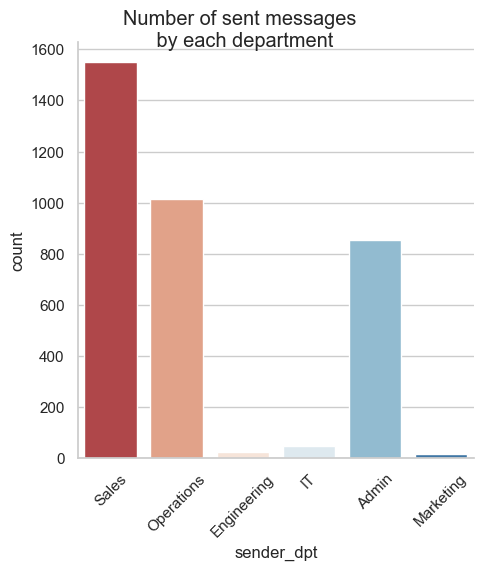

In [7]:
sns.set_palette("RdBu")
sns.set_context("notebook")
sns.set_style('whitegrid')

category_order = ['Sales', 'Operations', 'Engineering', 'IT', 'Admin', 'Marketing']

g = sns.catplot(x='sender_dpt', data = messages, order = category_order, kind = 'count')
g.fig.suptitle("Number of sent messages \n by each department", y = 1.03)
plt.xticks(rotation = 45)
plt.show()

Here I checked that Sales just sent 1551 messages in the period analyzed. Just to guide my analysis, I would like to know how is the distribution of received messages for the departments (this graph is on appendices notebook). The distribution of the amount of received messages by month is very similar to the amount of sent messages, showed above.

## How the data changed in time

Sales received 1229 messages. It seems that the departments who sent more messages also received more messages, this is a hint that these were the most active at the period analyzed. Now, this analysis is true when looking for all the period, considering an average for the period. However, we know that, through time, we might vary a lot a data, making the average not a good metric, so let's check how this data varies along the time it was collected:

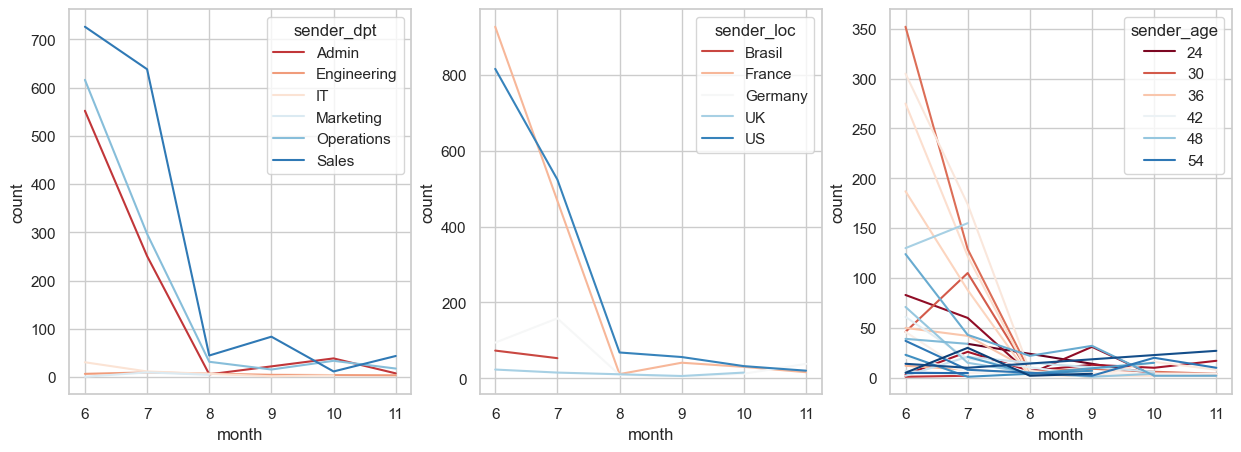

In [8]:
plot_through_time('sender_dpt', 'sender_loc', 'sender_age')

We made the same analysis for the received messages and it is found in the appendices notebook. The behavior was similar to the behavior of plot for sent messages.

## Considering the most recent months

Okay, so all locations still receive messages during the period. And the graphs have the same behavior as expected because we have more messages sent, and so received, on the first two months. Now let's see what if we consider only the last four months.

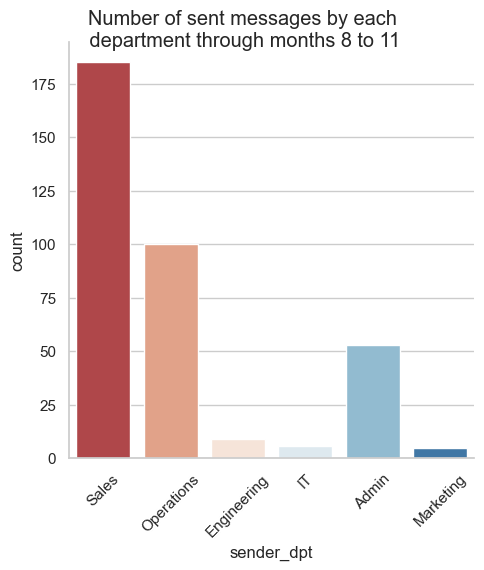

In [9]:
messages_8_to_11 = messages[messages['timestamp'].dt.month >= 8]

g = sns.catplot(x='sender_dpt', data = messages_8_to_11, order = category_order, kind = 'count')
g.fig.suptitle("Number of sent messages by each\n department through months 8 to 11", y = 1.03)

plt.xticks(rotation = 45)
plt.show()

## Concluding the most/least active

We find that the Sales department is the most active and the Marketing department is the least active in terms of sending and receiving messages. However, they were way more active during months 6 and 7 than they were on months 8 to 11.

Here I would like to know about the company: why the first two months we had a more intensive communication than the last four?

If this happens every year, as a result of closing a year report, for example, I would consider the first analysis, taking the average of all the period we have data, to consider the most active department.

If this happened because of an abnormal and punctual fact, then it would be better considered only the data of the last four months, so we can get a better metric for the present of the company. The fact might be a conclusion reached on reference[1], where they found "both out- and in-degree show a rapid increase in the first 6 weeks, and then they stabilize in the remaining weeks". This stabilization is considering a cumulative count, and as we have a lower increase rate, we will have the same stabilization if considered cumulative counts. The out and in degree corresponds to the messages sent and received.

In all the cases, the most active department is Sales, followed by Operations. And the least active department is Marketing. 

*I tried to find a relation with Covid-19, the end of the home office and this drop in number of messages send after month 7, the analysis is on the appendices notebook, it seems that there is no relation between this drop of sent messages and the end of home offices.

# 2) Employee with the most connections
To find the employees with more connections, first I searched for the employee who sent the most messages. But that might not be the answer to it, if one employee send hundreds of messages to only one other employee, he will have many messages send and only one connection. Therefore, I looked for the employee who sent more messages to different employees. I did this by just removing the duplicated rows of sender column.

## Employee most connected considering all the period 

I consider that a connection is made when someone sends OR receives a message. Different of others social network, the network here is from people of the same company, so I consider that if someone received a message of other department, somehow he has a connection with this other person. If I considered that 'A' has a connection with 'B' only if 'A' sends a message to 'B', I would get the same result though as we can see on the two graphs below(which is the employee 598).

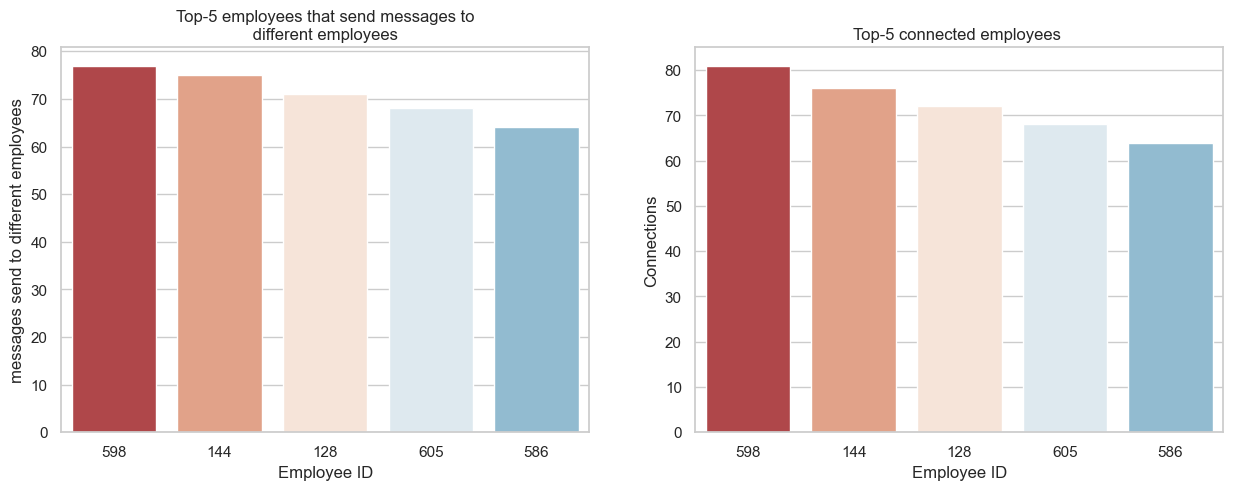

In [10]:
emp_interactions(messages)

Here we found that the employee with id 598 (employee from Operations) has the most connections, sending and receiving messages to 81 other employees. We have the Top-5 employees with most connections. Let's see then if this employee sent messages along all the period the data was collected or just in the first two months.

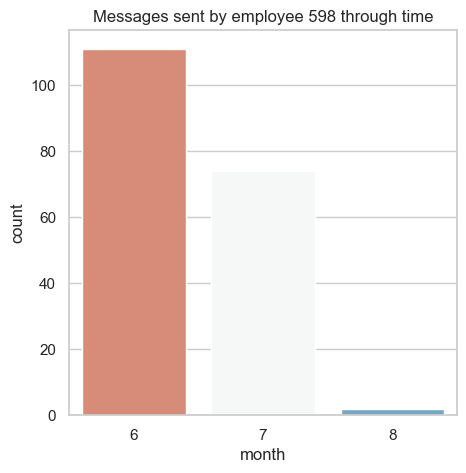

In [11]:
employee_z_through_time(598)

As above, employee 598 sent messages juns on months 6, 7 and 8, when he sent junt a few messages.

## Employee most connected considering he was active recently

So we have that employee 598 has more connections, but he was only active during months 6 and 7 (and send a few messages on month 8). Let's see, then, the employee who has more connections on the recent months. So let's consider the connections made on months 6 and 7, but only if the employee send message on the last two months:

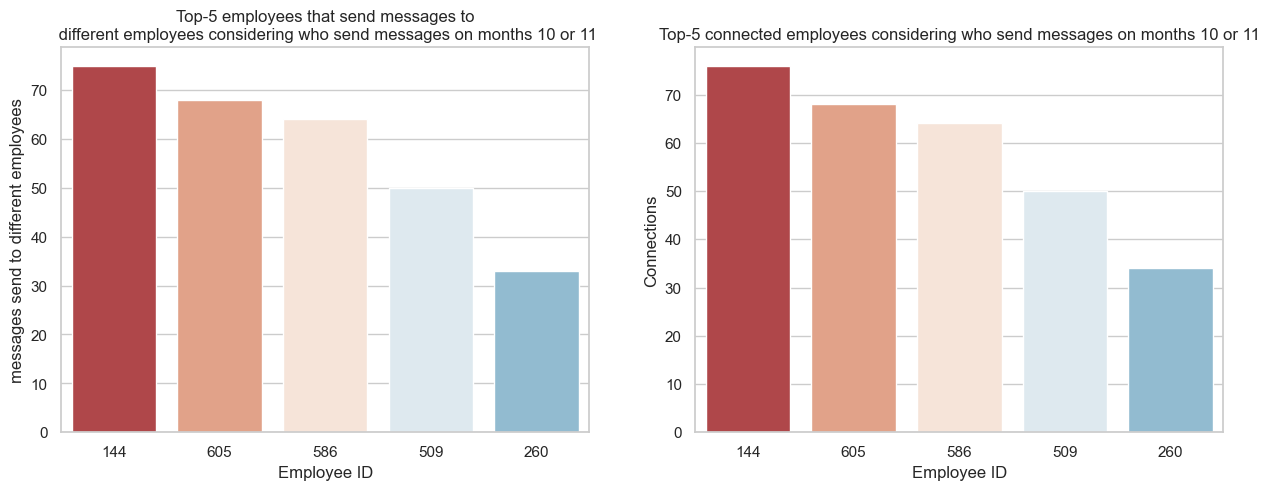

In [12]:
month_10 = messages[messages['timestamp'].dt.month == 10]
month_11 = messages[messages['timestamp'].dt.month == 11]

l10 = month_10['sender'].unique()
l11 = month_11['sender'].unique()

m_10 = messages['sender'].isin(l10)
m_11 = messages['sender'].isin(l11)

m_10_or_11 =  m_10 + m_11
messages_10_or_11 = messages[m_10_or_11]

emp_interactions(messages_10_or_11, 'considering who send messages on months 10 or 11')

We don't have difference here when looking for the employees with the most connections and the one who sent more messages to different employees, we get that this employee is the one with ID 144 (We still have the employee 144 if we considered the last 3 months). We can check his activity along the period analyzed:

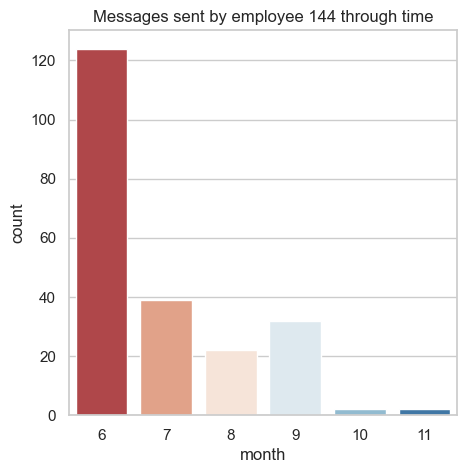

In [13]:
employee_z_through_time(144)

We get that the employee 144 sent just few messages on months 10 and 11. However, all the message network lost activity on the lasts months. 

## Conclusion for the employee with most connections

On the appendices notebook I checked how the activity of the employees behaved in the period, segregating by age, country and department. We have that fewer employees sent messages over time. There still are employees from all ages, departments and almost all countries sending messages.

Our conclusion is that employee 598 has the most connection on the average and the employee 144 has the most connections considering the employees who were active recently, as employee 598 just sent messages on the first two months.

We have here one insight similar to the one from the paper used as reference[1]: "Not only does the rapid growth of the system occur during the first 6 weeks since the day the system started, but also users tend to concentrate their activities of creation of new acquaintances in their first 6 weeks of system use", although the social network studied on each study is pretty different.

# 3) Most influential departments and employees
Here, I will search first for the department that sent more messages to other departments and the one who sent more messages to the employees, this I will take as most influential department. Then, I will look for the employees who sent more messages.

## Checking the interaction between departments through the whole period the data was collected

First, let's take a look at how departments interacts with each others, that can be analyzed in the figure below. We can also analyze the network of strong relationships, I considered that sending more than 10 messages per month, approximately 60 during the period observed, resumes a strong relation between two departments (or the relation of one department with itself). We can draw a digraph of the strong relations between the departments:

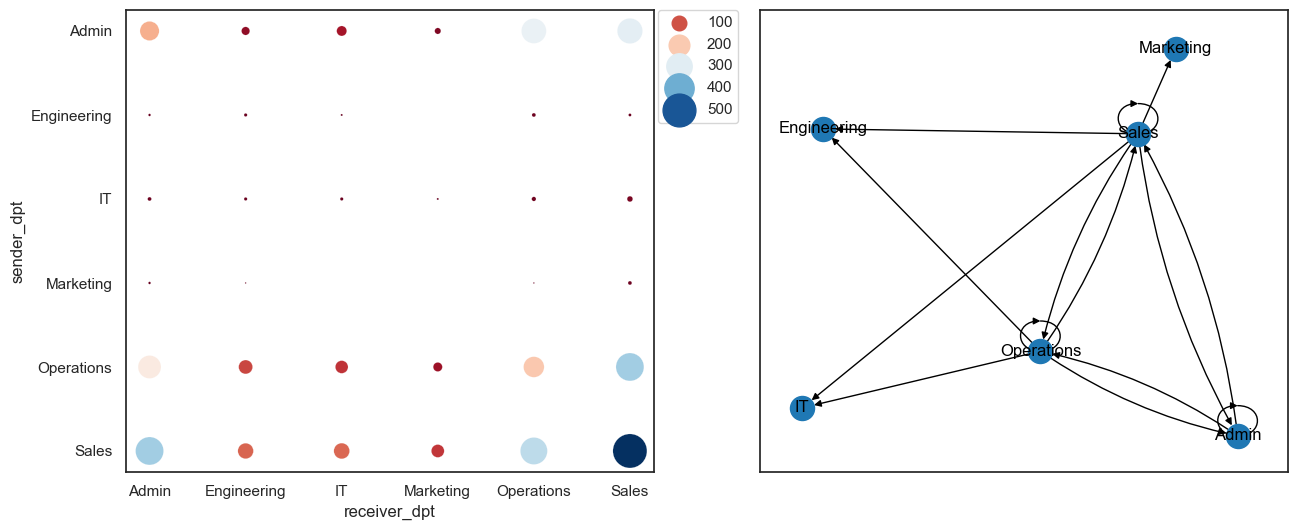

In [14]:
plot_interactions_and_network(messages,'sender_dpt', 'receiver_dpt', 60, 10)

We have that 3 departments are tightly connected to themself and the others, and 3 other departments are barely connected. By the figure we can conclude that the sales department is the most influential one.

## Checking the interaction between two the deparments considering the most recent months

However, as we saw, we have two different tendencies, the first two months we had a lot of messages sent from the departments we found more influential. But considering the most recent tendency as a better correspondence for the recent months, let's analyze the data from months 8 through 11. As the number of messages decreased a lot, we can draw a network of the influence, considering that one department has influence to another if it sends on average 2.5 messages to this other department:

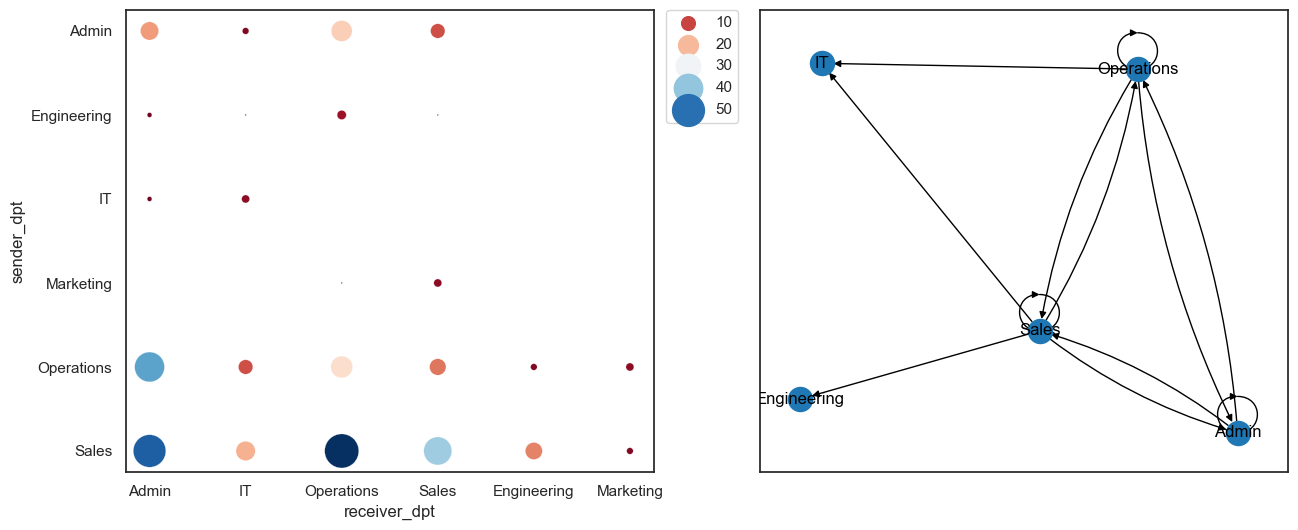

In [15]:
plot_interactions_and_network(messages_8_to_11,'sender_dpt', 'receiver_dpt', 10, 10)

Here we can see that Sales department still most influential department when considering months 8 to 11. We can also see Admin department lost influence as the circles for the messages sent got very small, in comparison on its average.

As shown from the two graphics above, the Sales department is the most connected department, as it sent more messages to more departments. The Sales department is followed by the Operations department and the third more connected is the Admin. The others departments have poor connections, and we don't have a strong connection with any of the departments with Marketing.

I did an extra analysis on how interaction between countries looked like, this analisys and the network directed graph can be found in the appendices notebook. 

## Checking how the departments interacted with emlpoyees through all the months the data was collected

To search for the most influent department, let's also have a look on how many employees each department sent messages to.

In [16]:
dpt_to_emp(messages)

    sender_dpt  number of employees reached
0        Admin                          179
1  Engineering                           22
2           IT                           31
3    Marketing                            7
4   Operations                          287
5        Sales                          364


We have that Sales is department sent messages to more employees, below we can see how this messages was distribuited along the departments:

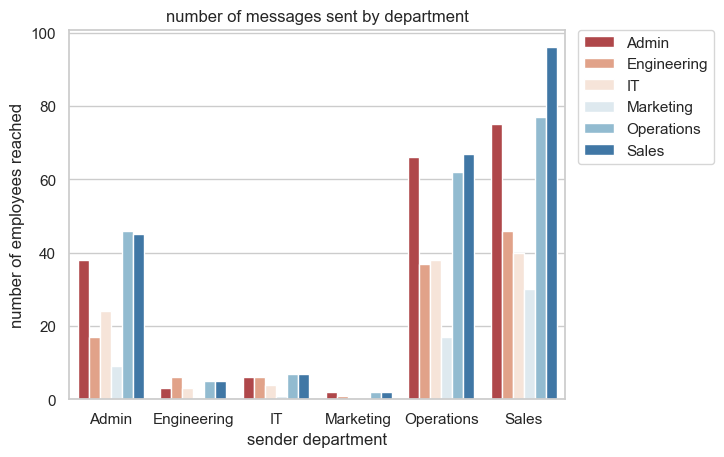

In [17]:
plot_dpt_to_emp(messages)

We have that sales sent more messages, and also reaches more departments. We also made a analisys based on the data for the last 4 months but we got the same conclusion, you can find this analisys on the appendices notebook.

## Concluding the most influential department

So we have that Sales reached more employees and more departments, considering the whole period the data was collected and the lasts four months that had less activity too. So, Sales is the most influent department.

## Looking for the employee who interacted the most

First, last check the employees who sent more messages on the 6 months:

In [18]:
messages_sent(messages)

   sender id  number of messages sent
0        605                      459
1        128                      266
2        144                      221
3        509                      216
4        389                      196


We have that employee 605 send the most messages, almost the double of messages sent comparing with the second place. We have already seen that he was the fourth with most connections, behind employees 598, 144 and 128. Let's see how the activity of the employee 605 was during the period analyzed:

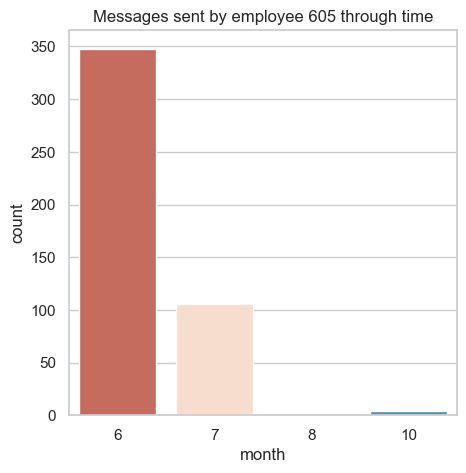

In [19]:
employee_z_through_time(605)

As the employee 605 sent just few messages on the last months, we made an analysis considering the last four months, to then check if we get another result for the most influential employee, this you can find in appendices notebook.

## Concluding the most influential employee

Here we have that employee 605 sent about **450 messages** and had about **70 connections** over the whole period, while employee 144 sent about **220 messages** and had about **80 connections**. We consider the employee 605 the most influential, as he has recent activity and sent almost the double quantity of messages comparing to the second employee that sent more messages.

# Conclusion and my recommend to boost collaboration

Let's see if the network structure is dominated by a few highly connected nodes. To do so, let's consider in each department, what percentage represents the employees who send more than 10 messages.

In [20]:
highly_connected(messages, 10)

    sender_dpt  % of strongly influent employees
0        Admin                             45.45
1  Engineering                             12.50
2           IT                             14.29
3    Marketing                             33.33
4   Operations                             73.68
5        Sales                             80.77


And as the activity dropped, lets consider just the last 4 months too, but now considering that a high connected employee is the one that sent more than 4 messages.

In [21]:
highly_connected(messages_8_to_11, 4)

    sender_dpt  % of strongly influent employees
0        Admin                             57.14
1  Engineering                             66.67
2           IT                            100.00
3    Marketing                            100.00
4   Operations                             60.00
5        Sales                             57.14


We can see that on the most active departments, the rate of highly connected employees dropped. These departments had more employees sending messages but just a few of them sent more messages. And we can see that on less active departments, just few employees were highly connected, but, considering the lasts 4 months, the employees who still active on these departments were more strongly connected.

## Conclusion

A well-connected network is good for a company, the messages will reach people faster and the employees will be more focused on seeking a common good for the company. Therefore, I reccommend an increasing communication of the Marketing department, so that the company's advertisements better reflect its product, it's thinking. I also recommend increasing the communication of the engineering department, specially with itself, so as the development of new product of the company seek a common path, the innovations communicate each other.

I recommend for the employees of Sales department, as well as Operations and Admin, to have strong communication again, as the employees of these three departments dropped on rate of strong communication.

All of this might be reached by improving the communication channel, getting new features to keep the employees using mainly the same communication channel.

Thank you for reading my report. If you liked the discussion made here, please, upvote my notebook!

# References

[1] Panzarasa, P., Carley K. M., Opsahl T., Patterns and Dynamics of Users' Behavior and Interaction: Network Analysis of an Online Community. Journal of the American Society for Information Science and Technology. May 2009.